In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
df =  pd.read_csv(r"krisnaik_linear_regression_data.csv")

In [5]:
df.head()

,weight,height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'height')

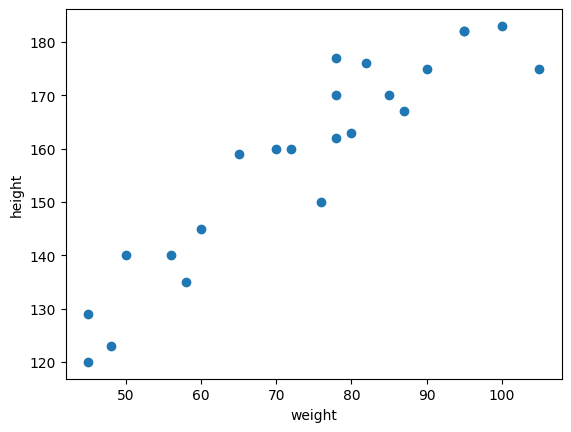

In [6]:
##Scatter plot
plt.scatter(df['weight'],df['height'])
plt.xlabel("weight")
plt.ylabel("height")

In [7]:
##correlation
df.corr()

,weight,height
weight,1.000000,0.931142
height,0.931142,1.000000


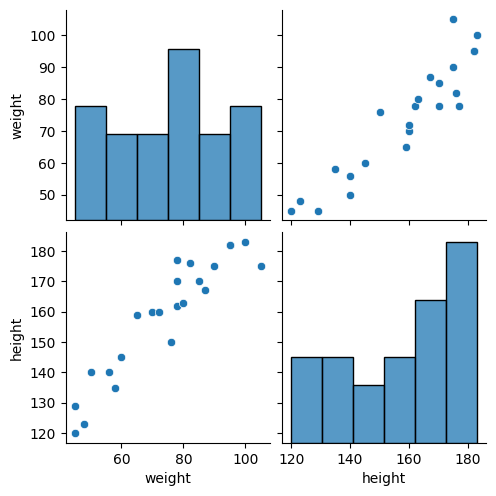

In [9]:
## Seaborn for visualization 
import seaborn as sns
sns.pairplot(df)

In [12]:
## Independent features and dependent features
x = df[['weight']] ## independent feartures should be two dimensional array
y = df['height'] ## this variable can be of one dimension or in series

In [11]:
df.shape

(23, 2)

In [13]:
## train test split 
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [16]:
x_train.shape

(17, 1)

In [17]:
## Standarization
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [20]:
x_train = scaler.fit_transform(x_train)

In [21]:
x_test = scaler.transform(x_test)

In [25]:
## Apply Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs=-1)

In [26]:
model.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [30]:
print("Coefficient or Slope",model.coef_)

Coefficient or Slope [17.2982057]


In [31]:
print("Intercept",model.intercept_)

Intercept 156.47058823529412


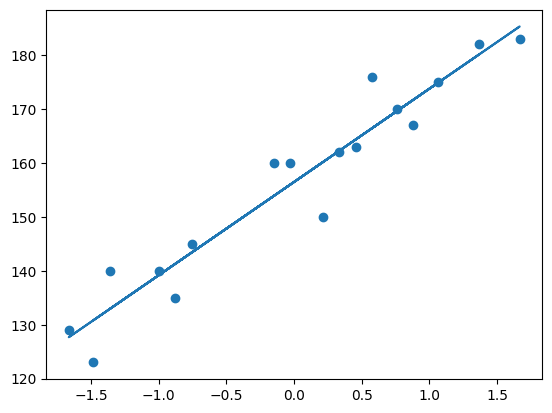

In [33]:
## plot training data best fit line
plt.scatter(x_train,y_train)
plt.plot(x_train,model.predict(x_train))

### prediction of test data 
1. predicted height output = intercept + coef_(weights)

2. y_pred_test = 156.470 + 17.29(x_test)

In [35]:
## Predictions for test data
y_pred  = model.predict(x_test)

In [36]:
## performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [37]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print("MSE",mse)
print("MAE",mae)
print("RMSE",rmse)

MSE 114.84069295228699
MAE 9.66512588679501
RMSE 10.716374991212605


In [38]:
from sklearn.metrics import r2_score

In [39]:
score = r2_score(y_test,y_pred)

In [40]:
score

0.7360826717981276

In [41]:
#display adjusted r squared 
1 - (1 - score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1) 

0.6701033397476595

## OLS  LINEAR REGRESSION


In [42]:
import statsmodels.api as sm


In [43]:
model_ols = sm.OLS(y_train,x_train).fit()

In [45]:
prediction = model_ols.predict(x_test)

In [46]:
print(model_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                 height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Thu, 13 Mar 2025   Prob (F-statistic):                       0.664
Time:                        23:44:11   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\Piyush\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [50]:
## prediction for new data
model.predict(scaler.transform([[72]]))

C:\Users\Piyush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])

In [51]:
from sklearn.model_selection import cross_val_score

In [52]:
help(cross_val_score)

Help on function cross_val_score in module sklearn.model_selection._validation:

cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, params=None, pre_dispatch='2*n_jobs', error_score=nan)
    Evaluate a score by cross-validation.

    Read more in the :ref:`User Guide <cross_validation>`.

    Parameters
    ----------
    estimator : estimator object implementing 'fit'
        The object to use to fit the data.

    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        The data to fit. Can be for example a list, or an array.

    y : array-like of shape (n_samples,) or (n_samples, n_outputs),             default=None
        The target variable to try to predict in the case of
        supervised learning.

    groups : array-like of shape (n_samples,), default=None
        Group labels for the samples used while splitting the dataset into
        train/test set. Only used in conjunction with a "Group" :term:`cv`
     